In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ames.csv")

In [3]:
def calc_mi(X,y):
    X = X.copy()
    for column in X:
        if X[column].dtype == "object" or X[column].dtype == "O":
            X[column], _ = X[column].factorize()
    discrete = [X[i].dtype != 'float64' for i in X]
    mi_scores = mutual_info_regression(X,y,discrete_features=discrete, random_state=0)
    MI = {}
    for i, val in enumerate(X):
        MI[val] = mi_scores[i]
    return MI
    

In [4]:
X = df.copy()
y = X.pop("SalePrice")

In [14]:
MI = calc_mi(X,y) # calculating Mutual Information scores

In [15]:
# plotting top n features

def top_n_features(MI,n):
    # MI is the dictionary of features and their corresponding MI scores
    # n is the number of features wanted
    tuples = list(zip(list(MI.keys()), list(MI.values()))) # tuple of features and their MIs
    tuples.sort(key=lambda x: x[1], reverse=True)
    if n > len(tuples): 
        print("There are only " + str(len(tuples)) + " features")
        return
    MI_topn = dict(tuples[:n])
    plt.figure(figsize=(13,13))
    plt.title("Top " + str(n) + " features")
    ax = sns.barplot(y= list(MI_topn.keys()), x = list(MI_topn.values()), orient='h')
    
    return MI_topn


{'OverallQual': 0.5812623356374536,
 'Neighborhood': 0.5698127751693254,
 'GrLivArea': 0.4969090680166133,
 'YearBuilt': 0.4379385752506346,
 'GarageArea': 0.4150139869867129,
 'TotalBsmtSF': 0.39027965364254147,
 'GarageCars': 0.381467323566663,
 'FirstFlrSF': 0.3688248125015381,
 'BsmtQual': 0.3647787159859601,
 'KitchenQual': 0.326193982941934,
 'ExterQual': 0.3223898476840108,
 'YearRemodAdd': 0.3154018517554391,
 'MSSubClass': 0.2871312572857434,
 'GarageFinish': 0.2654403676396062,
 'FullBath': 0.2516931054359648,
 'Foundation': 0.23611491844513455,
 'LotFrontage': 0.2333337877660222,
 'GarageType': 0.22611725927884407,
 'FireplaceQu': 0.22195451681982625,
 'SecondFlrSF': 0.20065841780637284,
 'BsmtFinType1': 0.19064518523341212,
 'TotRmsAbvGrd': 0.1903129652829456,
 'BsmtFinSF1': 0.1874479778888709,
 'OpenPorchSF': 0.17966220326145343,
 'Exterior2nd': 0.17478634470590038,
 'Fireplaces': 0.17227770750489935,
 'MasVnrArea': 0.16940761514736646,
 'Exterior1st': 0.16877465016320725,

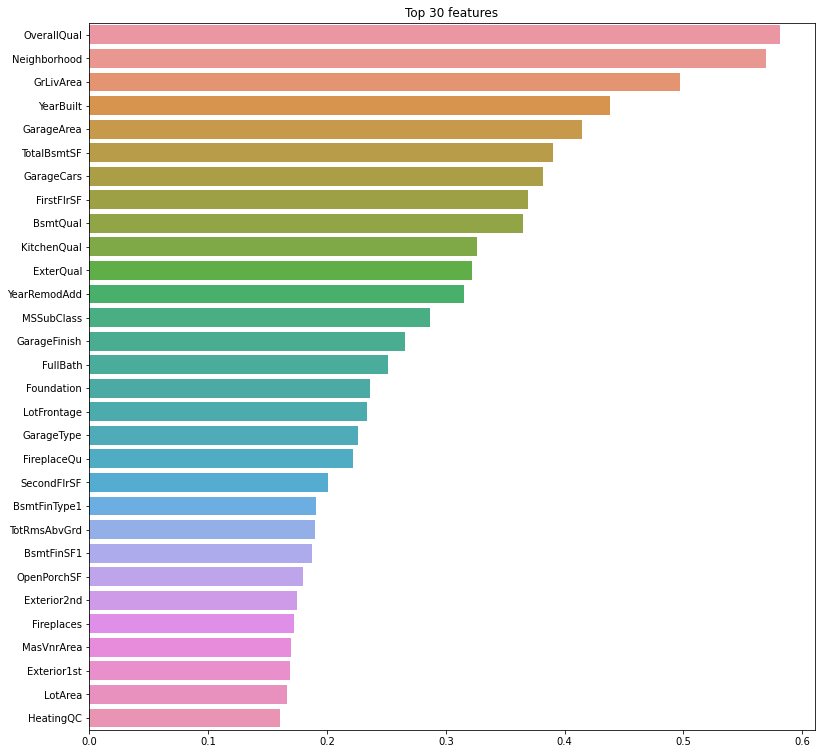

In [16]:
top_n_features(MI,30)